## Task 1 Part c)

In [1]:
from radio_stream_recorder import RadioSonicArchiveGenerator

# Import additional libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# Set output directory
output_dir = "radio_sonic_archive"

# Initialize the generator
generator = RadioSonicArchiveGenerator(output_dir)
generator.radio_stations

{'SomaFM_Groove': 'https://ice2.somafm.com/groovesalad-128-mp3',
 'SomaFM_Drone': 'https://ice2.somafm.com/dronezone-128-mp3',
 'SomaFM_Jazz': 'https://ice2.somafm.com/sonicuniverse-128-mp3',
 'SomaFM_Indie': 'https://ice2.somafm.com/indiepop-128-mp3',
 'SomaFM_Folk': 'https://ice2.somafm.com/folkfwd-128-mp3',
 'SomaFM_Ambient': 'https://ice2.somafm.com/spacestation-128-mp3',
 'SomaFM_Lounge': 'https://ice2.somafm.com/lush-128-mp3'}

In [ ]:
# Record audio files (reduced number for demo purposes)
num_recordings = 30  # Change to 30 for the full dataset

# Configure recording parameters
generator.record_multiple_segments(
    num_files=num_recordings,
    min_duration=30,  # minimum duration in seconds
    max_duration=90,  # maximum duration in seconds
    file_format="mp3",
    random_stations=True
)

# Get dataset summary
summary = generator.get_dataset_summary()
print(f"Generated {summary.get('total_files', 0)} files from {summary.get('total_stations', 0)} stations")
print(f"Total duration: {summary.get('total_duration', 'unknown')} seconds")

# Show station distribution
if 'stations' in summary:
    print("\nStation Distribution:")
    for station, count in summary.get('stations', {}).items():
        print(f"  - {station}: {count} files")

2025-03-09 11:56:34,448 - INFO - Stream test successful for SomaFM_Groove
2025-03-09 11:56:36,649 - INFO - Stream test successful for SomaFM_Drone
2025-03-09 11:56:38,816 - INFO - Stream test successful for SomaFM_Jazz
2025-03-09 11:56:40,967 - INFO - Stream test successful for SomaFM_Indie
2025-03-09 11:56:43,129 - INFO - Stream test successful for SomaFM_Folk
2025-03-09 11:56:45,265 - INFO - Stream test successful for SomaFM_Ambient
2025-03-09 11:56:47,444 - INFO - Stream test successful for SomaFM_Lounge
2025-03-09 11:56:47,446 - INFO - Found 7 valid radio stations
2025-03-09 11:56:48,024 - INFO - Starting recording: SomaFM_Folk for 53 seconds
2025-03-09 11:57:27,086 - INFO - Recording complete: radio_sonic_archive\001_SomaFM_Folk_20250309_115647.mp3
2025-03-09 11:57:27,857 - INFO - Recorded file 1/30: 001_SomaFM_Folk_20250309_115647.mp3
2025-03-09 11:57:27,870 - INFO - Metadata saved to metadata.csv
2025-03-09 11:57:29,969 - INFO - Starting recording: SomaFM_Indie for 74 seconds
20

Loaded metadata with 7 records


file_id                                filename    station_name  \
0        1     001_SomaFM_Folk_20250309_115647.mp3     SomaFM_Folk   
1        2    002_SomaFM_Indie_20250309_115729.mp3    SomaFM_Indie   
2        3  003_SomaFM_Ambient_20250309_115832.mp3  SomaFM_Ambient   
3        4     004_SomaFM_Jazz_20250309_115947.mp3     SomaFM_Jazz   
4        5     005_SomaFM_Folk_20250309_120018.mp3     SomaFM_Folk   

                                             url        timestamp  \
0        https://ice2.somafm.com/folkfwd-128-mp3  20250309_115647   
1       https://ice2.somafm.com/indiepop-128-mp3  20250309_115729   
2   https://ice2.somafm.com/spacestation-128-mp3  20250309_115832   
3  https://ice2.somafm.com/sonicuniverse-128-mp3  20250309_115947   
4        https://ice2.somafm.com/folkfwd-128-mp3  20250309_120018   

   requested_duration  actual_duration format  
0                  53           52.990    mp3  
1                  74           73.993    mp3  
2                  86           86.009    mp3  
3                  43           43.012    mp3  
4                  80           80.001    mp3

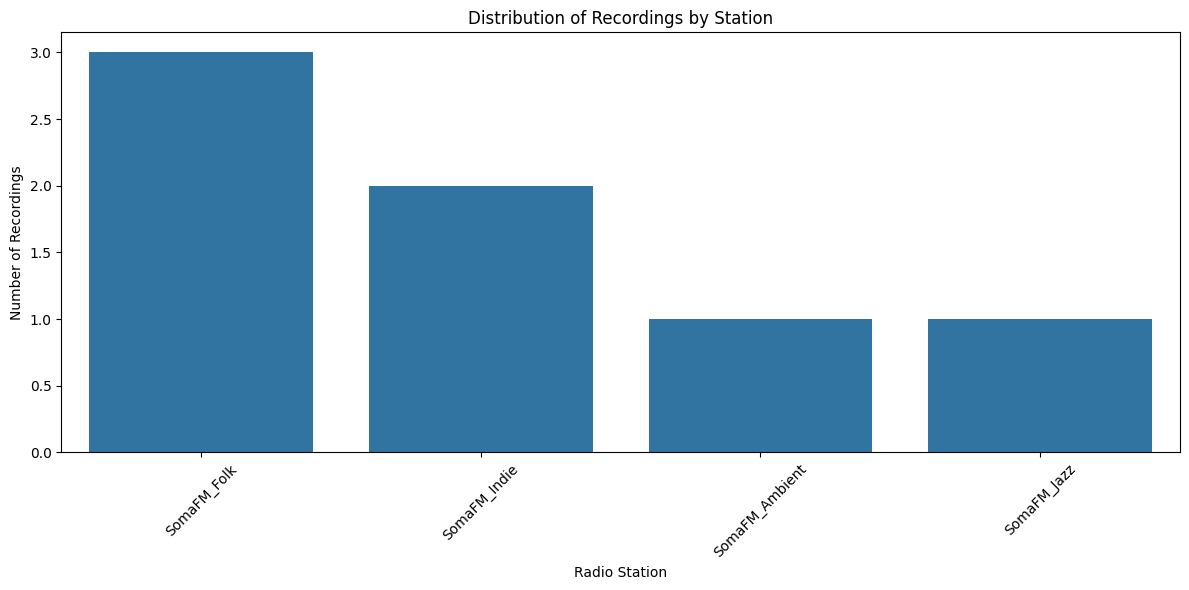

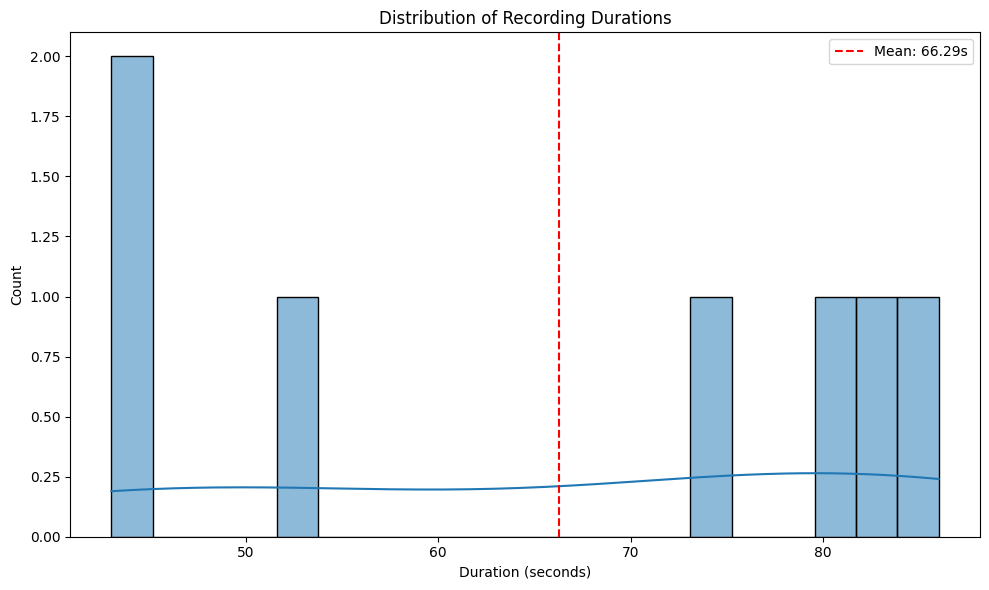

In [3]:
# Load metadata
metadata_file = os.path.join(output_dir, "metadata.csv")

if os.path.exists(metadata_file):
    metadata = pd.read_csv(metadata_file)
    print(f"Loaded metadata with {len(metadata)} records")
    
    # Display the first few rows
    display(metadata.head())
    
    # Plot distribution of recordings by station
    plt.figure(figsize=(12, 6))
    station_counts = metadata['station_name'].value_counts()
    sns.barplot(x=station_counts.index, y=station_counts.values)
    plt.title('Distribution of Recordings by Station')
    plt.xlabel('Radio Station')
    plt.ylabel('Number of Recordings')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Distribution of recording durations
    if 'actual_duration' in metadata.columns and metadata['actual_duration'].dtype != object:
        plt.figure(figsize=(10, 6))
        sns.histplot(metadata['actual_duration'], bins=20, kde=True)
        plt.title('Distribution of Recording Durations')
        plt.xlabel('Duration (seconds)')
        plt.ylabel('Count')
        plt.axvline(metadata['actual_duration'].mean(), color='red', linestyle='--', 
                    label=f'Mean: {metadata["actual_duration"].mean():.2f}s')
        plt.legend()
        plt.tight_layout()
        plt.show()
else:
    print(f"Metadata file not found at {metadata_file}")

## Analysis


Analyzing sample file: 007_SomaFM_Indie_20250309_120201.mp3


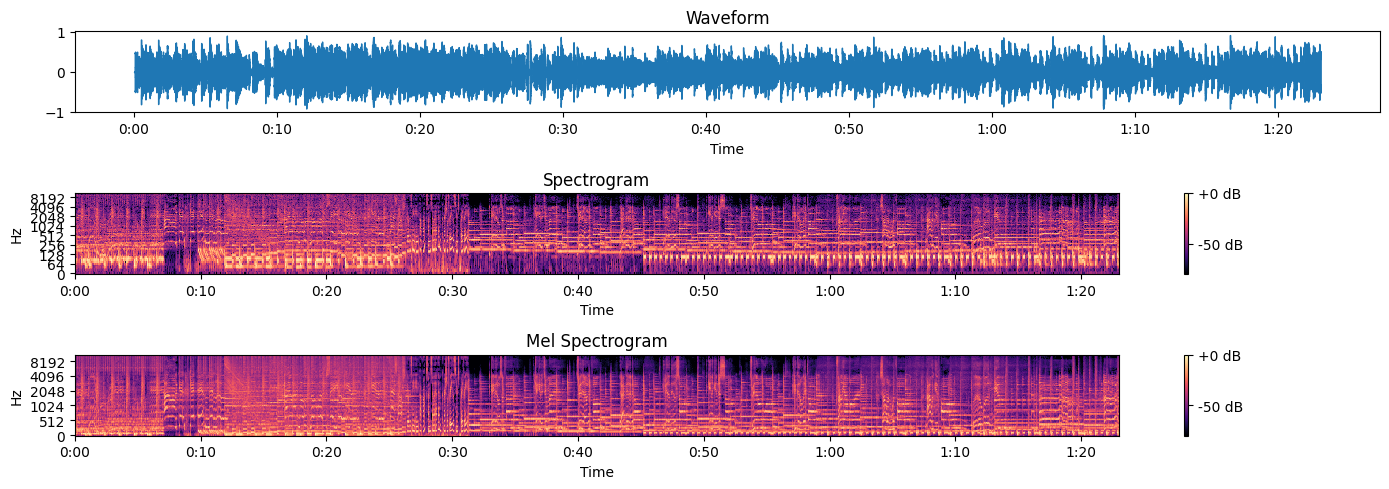

Audio Feature Statistics:
Spectral Centroid Mean: 2147.23
Spectral Rolloff Mean: 4426.89
Zero Crossing Rate Mean: 0.09
MFCC Mean: -1.09

Audio Player:


In [3]:
# Import librosa for audio analysis
import librosa
import librosa.display
import numpy as np
from IPython.display import Audio

# Function to analyze a sample audio file
def analyze_audio_sample(file_path):
    """Analyze a sample audio file and extract basic features"""
    # Load audio file
    y, sr = librosa.load(file_path, sr=22050)
    
    # Display waveform
    plt.figure(figsize=(14, 5))
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    
    # Display spectrogram
    plt.subplot(3, 1, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, y_axis='log', x_axis='time', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    
    # Display mel spectrogram
    plt.subplot(3, 1, 3)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_dB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel Spectrogram')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate some audio features
    # 1. Spectral Centroid
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    
    # 2. Spectral Rolloff
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
    
    # 3. Zero Crossing Rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)[0]
    
    # 4. MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    
    # Print feature statistics
    print("Audio Feature Statistics:")
    print(f"Spectral Centroid Mean: {np.mean(spectral_centroids):.2f}")
    print(f"Spectral Rolloff Mean: {np.mean(spectral_rolloff):.2f}")
    print(f"Zero Crossing Rate Mean: {np.mean(zero_crossing_rate):.2f}")
    print(f"MFCC Mean: {np.mean(mfccs):.2f}")
    
    # Play the audio
    print("\nAudio Player:")
    return Audio(y, rate=sr)

# Find an audio file in the dataset
audio_files = [f for f in os.listdir(output_dir) 
              if f.endswith('.mp3') or f.endswith('.wav')]

if audio_files:
    # Select the first file
    sample_file = os.path.join(output_dir, audio_files[0])
    print(f"\nAnalyzing sample file: {audio_files[0]}")
    display(analyze_audio_sample(sample_file))
else:
    print("No audio files found in the dataset directory.")


#### Use Case: Genre Classification Preparation

Let's define a mapping between radio stations and genres, which could be used for training a genre classifier.


In [4]:
# Define genre mapping for SomaFM stations
genre_mapping = {
    "SomaFM_Groove": "Electronic",
    "SomaFM_Drone": "Ambient",
    "SomaFM_Jazz": "Jazz",
    "SomaFM_Indie": "Indie",
    "SomaFM_Folk": "Folk",
    "SomaFM_Ambient": "Ambient",
    "SomaFM_Lounge": "Electronic"
}

# Add genre to metadata
if 'metadata' in locals():
    metadata['genre'] = metadata['station_name'].map(genre_mapping)
    
    # Count recordings by genre
    genre_counts = metadata['genre'].value_counts()
    
    # Plot recordings by genre
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genre_counts.index, y=genre_counts.values)
    plt.title('Distribution of Recordings by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Number of Recordings')
    plt.tight_layout()
    plt.show()
    
    # Save updated metadata with genre labels
    metadata.to_csv(os.path.join(output_dir, "metadata_with_genres.csv"), index=False)
    print(f"Saved metadata with genre labels to metadata_with_genres.csv")



#### Use Case Demo: Music Mood Analysis

We could also use the dataset for mood analysis. Let's demonstrate a simple approach.

Analyzing mood for 007_SomaFM_Indie_20250309_120201.mp3...
Analyzing mood for 008_SomaFM_Groove_20250309_120313.mp3...


arousal  valence       mood    energy                 tempo  \
0                     1        1      Happy  1.525488   [67.99958881578948]   
1  [0.9256826172704282]        1  Energetic  1.126704  [112.34714673913044]   

                                    file  
0   007_SomaFM_Indie_20250309_120201.mp3  
1  008_SomaFM_Groove_20250309_120313.mp3

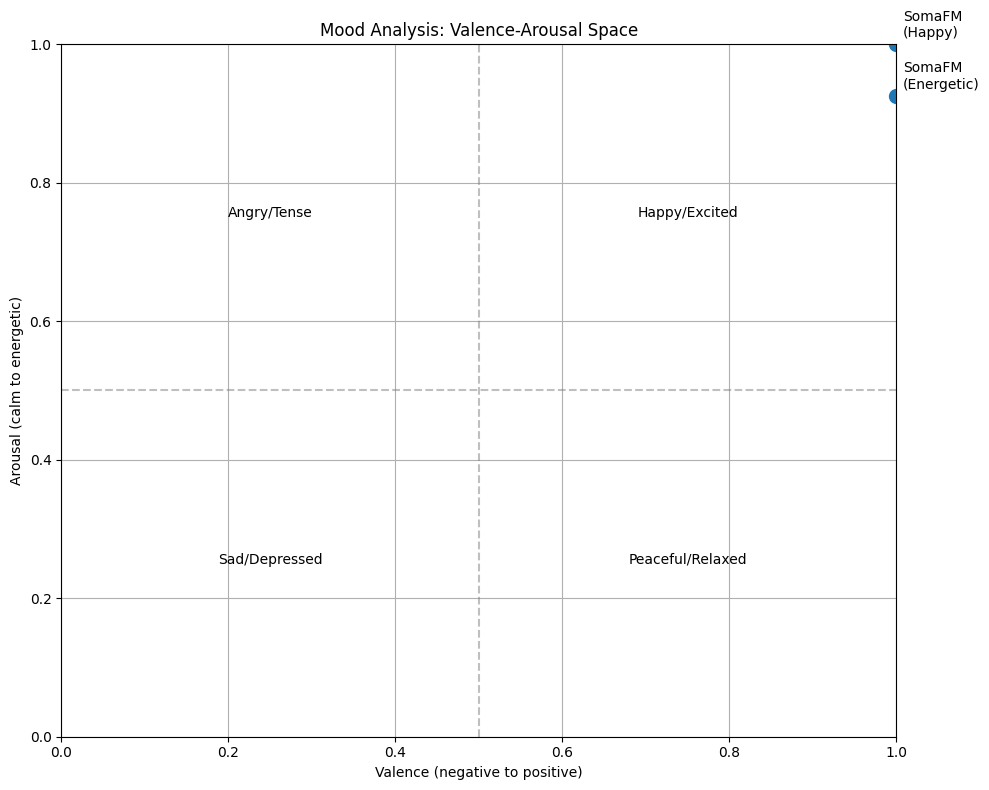

In [5]:
# Function to simulate mood analysis (in a real scenario, you'd use a model)
def analyze_mood(audio_file):
    """Simple simulation of mood analysis based on audio features"""
    # Load audio
    y, sr = librosa.load(audio_file, sr=22050)
    
    # Extract features
    # Energy (RMS)
    rms = librosa.feature.rms(y=y)[0]
    energy = np.mean(rms)
    
    # Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    
    # Spectral Contrast
    contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    mean_contrast = np.mean(contrast)
    
    # Map features to mood (simplified)
    energy_score = energy * 10  # Scale for easier interpretation
    tempo_score = tempo / 180  # Normalize to roughly 0-1
    
    # Calculate arousal (energy/activity level)
    arousal = (energy_score * 0.6 + tempo_score * 0.4) 
    
    # Calculate valence (positive vs negative)
    valence = 0.5 + (mean_contrast / 10)  # Center around 0.5
    
    # Clamp values
    arousal = max(0, min(1, arousal))
    valence = max(0, min(1, valence))
    
    # Map to mood quadrants
    moods = {
        'high_valence_high_arousal': ['Excited', 'Happy', 'Energetic'],
        'high_valence_low_arousal': ['Calm', 'Peaceful', 'Relaxed'],
        'low_valence_high_arousal': ['Angry', 'Tense', 'Nervous'],
        'low_valence_low_arousal': ['Sad', 'Depressed', 'Bored']
    }
    
    # Determine quadrant
    if valence >= 0.5 and arousal >= 0.5:
        quadrant = 'high_valence_high_arousal'
    elif valence >= 0.5 and arousal < 0.5:
        quadrant = 'high_valence_low_arousal'
    elif valence < 0.5 and arousal >= 0.5:
        quadrant = 'low_valence_high_arousal'
    else:
        quadrant = 'low_valence_low_arousal'
    
    # Pick a mood from the quadrant
    import random
    mood = random.choice(moods[quadrant])
    
    return {
        'arousal': arousal,
        'valence': valence,
        'mood': mood,
        'energy': energy_score,
        'tempo': tempo
    }

# Analyze mood for a few samples
if audio_files:
    # Take up to 5 files for demonstration
    sample_files = audio_files[:min(5, len(audio_files))]
    
    # Analyze each file
    results = []
    for file in sample_files:
        print(f"Analyzing mood for {file}...")
        file_path = os.path.join(output_dir, file)
        result = analyze_mood(file_path)
        result['file'] = file
        results.append(result)
    
    # Display results
    mood_df = pd.DataFrame(results)
    display(mood_df)
    
    # Plot on valence-arousal space
    plt.figure(figsize=(10, 8))
    plt.scatter(mood_df['valence'], mood_df['arousal'], s=100)
    
    # Add labels
    for i, row in mood_df.iterrows():
        plt.annotate(row['file'].split('_')[1] + f"\n({row['mood']})", 
                     (row['valence'], row['arousal']),
                     xytext=(5, 5), textcoords='offset points')
    
    plt.title('Mood Analysis: Valence-Arousal Space')
    plt.xlabel('Valence (negative to positive)')
    plt.ylabel('Arousal (calm to energetic)')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.grid(True)
    
    # Add quadrant labels
    plt.text(0.25, 0.25, "Sad/Depressed", ha='center')
    plt.text(0.75, 0.25, "Peaceful/Relaxed", ha='center')
    plt.text(0.25, 0.75, "Angry/Tense", ha='center')
    plt.text(0.75, 0.75, "Happy/Excited", ha='center')
    
    # Add quadrant lines
    plt.axhline(0.5, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(0.5, color='gray', linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()




### Use case - Radio/Audio classifier 

Loaded metadata with 30 records
Loaded metadata with 30 records
Fixed column 'tempo' by converting from string to float
Loaded features for 30 files
Training genre classification model...
Training the genre classification model...
Evaluating the model...

Classification Report:
              precision    recall  f1-score   support

     Ambient       1.00      1.00      1.00         3
  Electronic       0.50      1.00      0.67         2
        Folk       1.00      1.00      1.00         1
       Indie       1.00      0.50      0.67         2
        Jazz       0.00      0.00      0.00         1

    accuracy                           0.78         9
   macro avg       0.70      0.70      0.67         9
weighted avg       0.78      0.78      0.74         9

Model saved to .\Task1_c\radio_sonic_archive\genre_classifier_model.joblib
Accuracy: 0.7777777777777778
Feature importance plot saved to .\Task1_c\radio_sonic_archive\feature_importance.png
Loaded metadata with 30 records
Loaded met

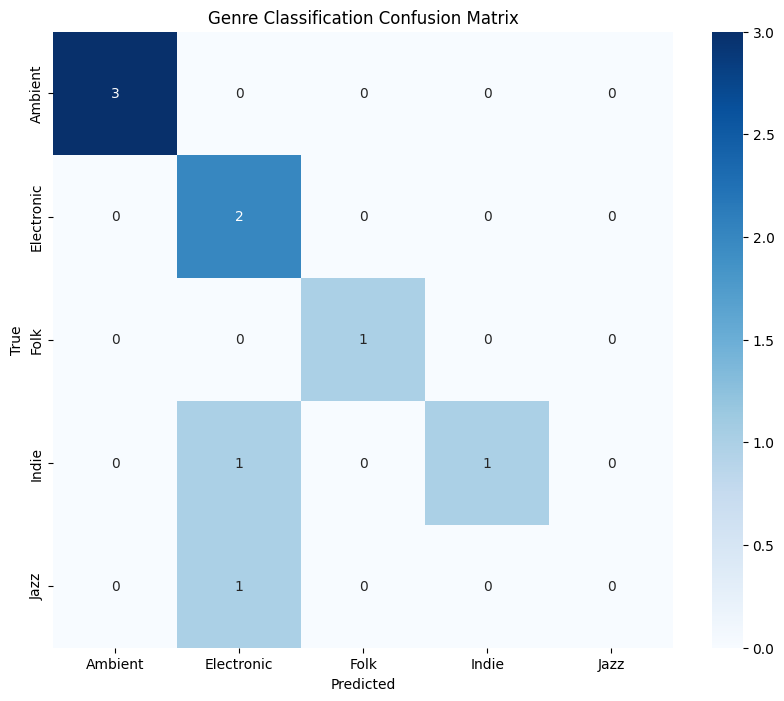

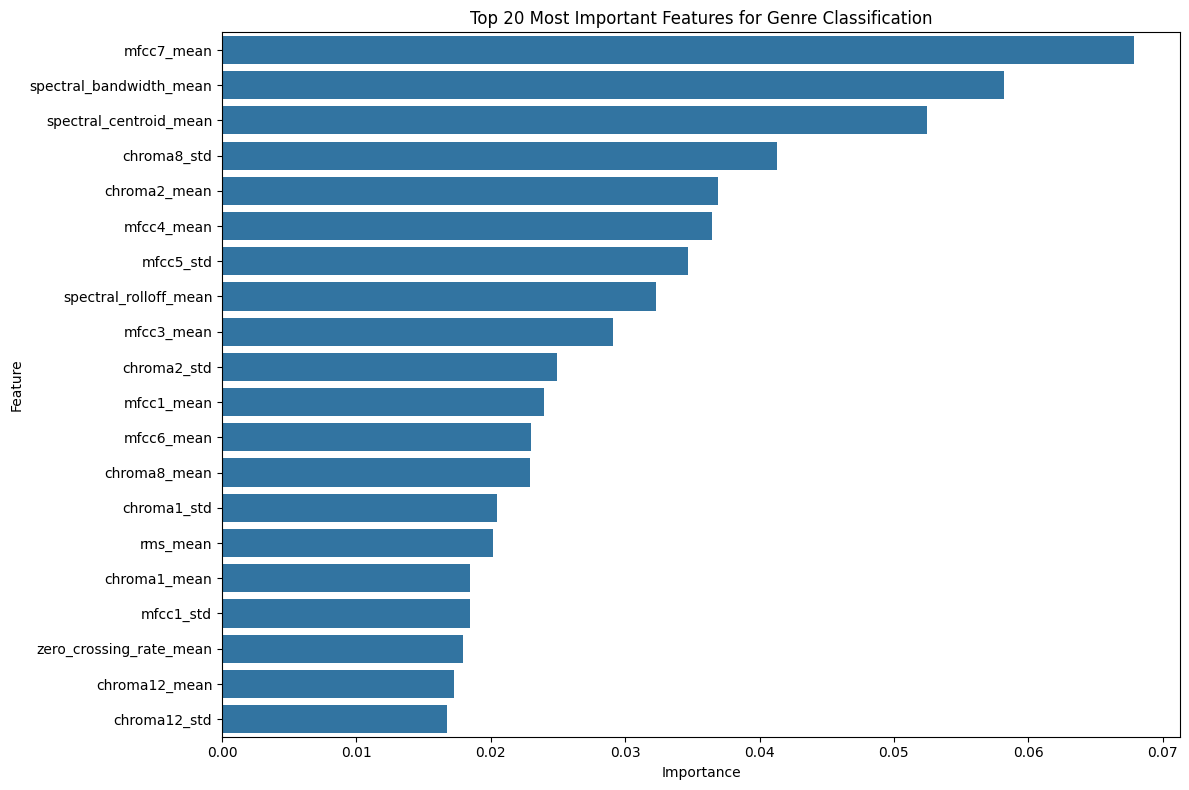

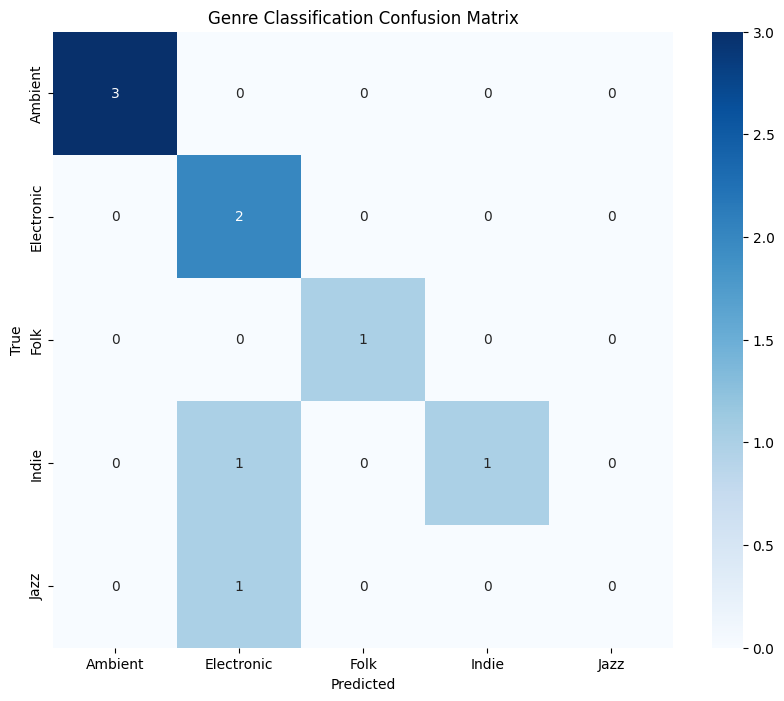

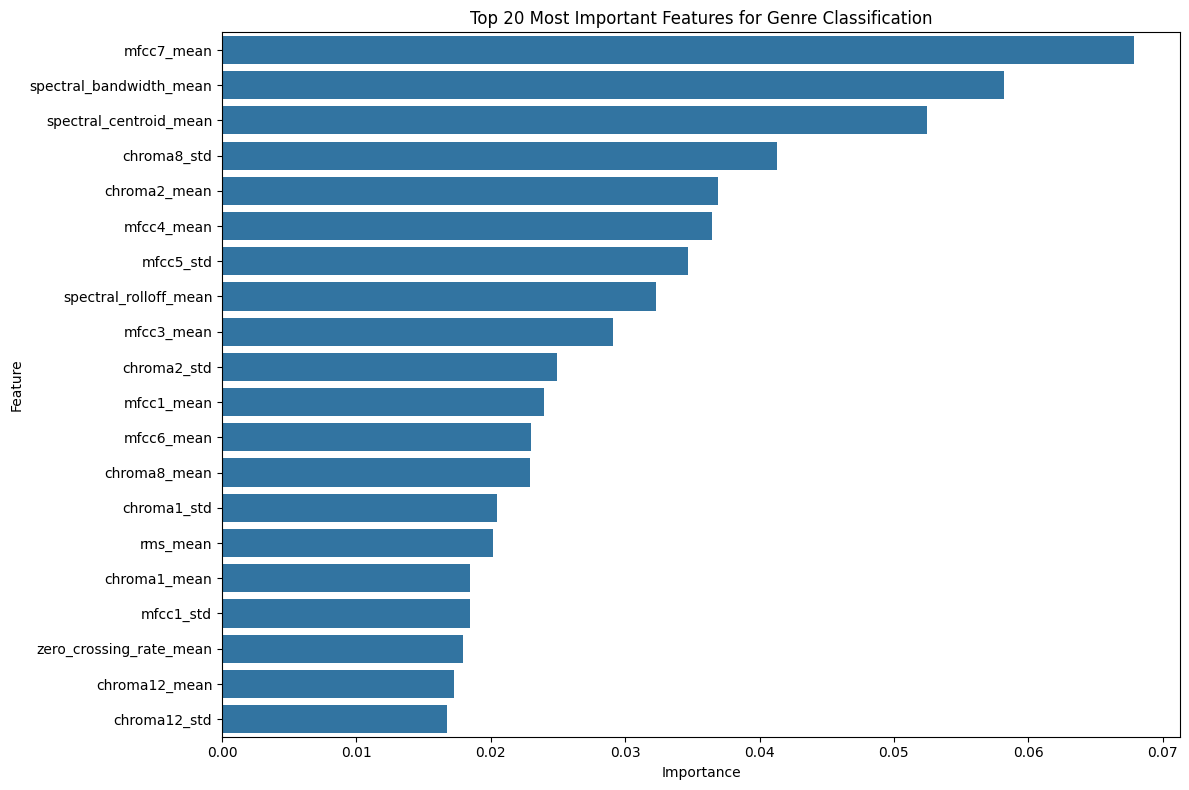

In [6]:
from visualizer_audio import RadioGenreClassifier

# Initialize the classifier with default dataset directory
radio_classifier = RadioGenreClassifier()

# Load pre-existing metadata and features if available
metadata = radio_classifier.load_metadata()
features = radio_classifier.load_features()

# If features aren't available, extract them
if features is None:
    print("Extracting features from audio files...")
    features = radio_classifier.extract_all_features(max_files=100, duration=30)

# Train the classification model
print("Training genre classification model...")
results = radio_classifier.train_model()

from visualizer_audio import RadioGenreClassifier

# Initialize the classifier with default dataset directory
radio_classifier = RadioGenreClassifier()

# Load pre-existing metadata and features if available
metadata = radio_classifier.load_metadata()
features = radio_classifier.load_features()

# If features aren't available, extract them
if features is None:
    print("Extracting features from audio files...")
    features = radio_classifier.extract_all_features(max_files=100, duration=30)

# Train the classification model
print("Training genre classification model...")
results = radio_classifier.train_model()
results

#Classify a new audio file
test_file = r".\Task1_c\radio_sonic_archive\003_SomaFM_Drone_20250308_215235.mp3"  # Replace with actual file path
classification = radio_classifier.classify_new_audio(test_file)

if classification:
    print(f"\nFile: {classification['file']}")
    print(f"Predicted genre: {classification['predicted_genre']}")
    print("\nGenre probabilities:")
    for genre, prob in sorted(classification['probabilities'].items(), key=lambda x: x[1], reverse=True):
        print(f"  {genre}: {prob:.4f}")

# Generate visualizations for the audio file
visualizations = radio_classifier.visualize_audio(test_file, save_dir="visualizations")

if visualizations:
    print("\nVisualizations saved to:")
    for viz_type, file_path in visualizations.items():
        print(f"  {viz_type}: {file_path}")

# # You can also use the classifier in a loop to process multiple files
# import os

# test_directory = "path/to/test_files"  # Replace with actual directory
# for filename in os.listdir(test_directory):
#     if filename.endswith((".mp3", ".wav", ".ogg")):
#         file_path = os.path.join(test_directory, filename)
#         print(f"\nProcessing: {filename}")
        
#         # Classify the file
#         result = radio_classifier.classify_new_audio(file_path)
#         if result:
#             print(f"Predicted genre: {result['predicted_genre']}")

#### Conclusion

In this notebook, we've demonstrated how to:

1. Create a dataset of radio stream recordings
2. Visualize and explore the audio data
3. Extract features for audio analysis
4. Set up genre classification training data
5. Perform mood analysis on the audio

The RadioSonicArchive dataset can be used for various audio analysis tasks, including:
- Genre classification
- Mood detection